In [70]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv("PATH_CUSUM"))

from source.generator.change_point_generator import ChangePointGenerator

# Create two data streams

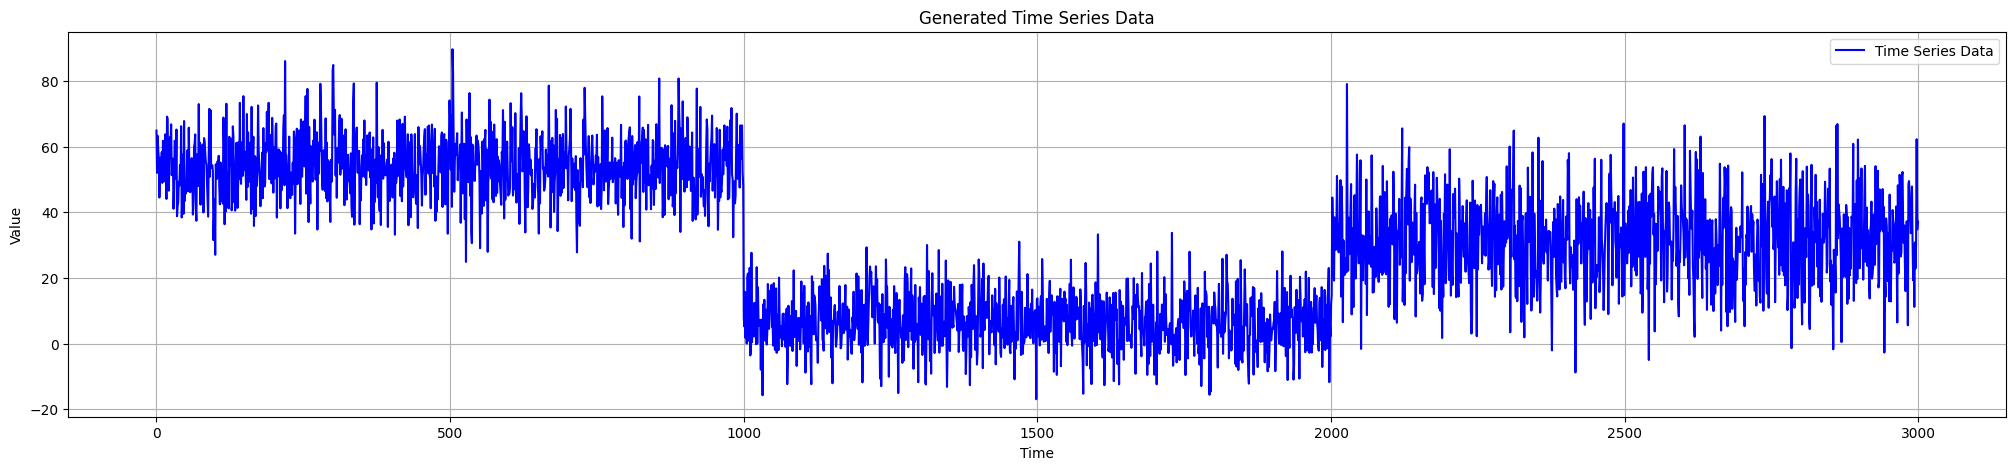

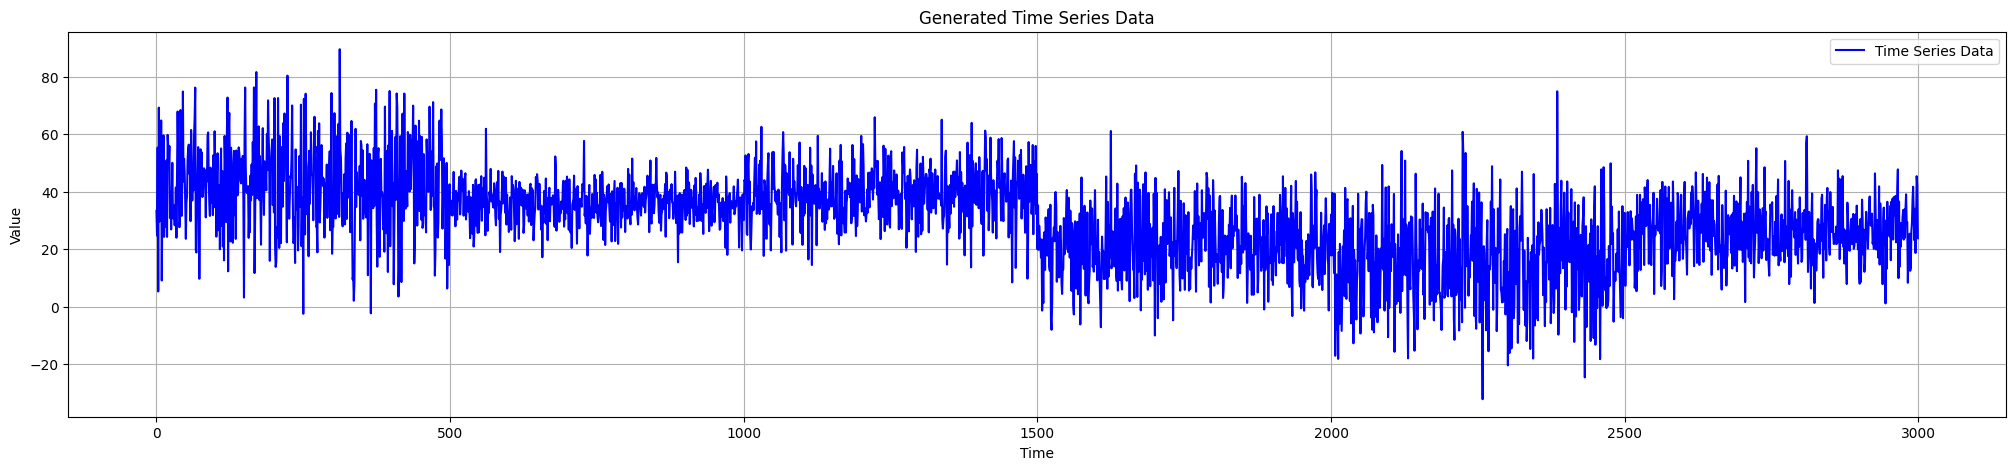

In [71]:
from source.generator.ds_generator import MultiDataStreams

dict_streams = [{"num_segments": 3,
                 "segment_length": 1000,
                 "change_point_type": "sudden_shift",
                    "seed": 100},
                {"num_segments": 6,
                    "segment_length": 500,
                    "change_point_type": "sudden_shift",
                    "seed": 1}]

many_data_streams = MultiDataStreams(dict_streams=dict_streams)
many_data_streams.generate_data_streams()
many_data_streams.plot_all_streams()


In [72]:
# Get Data Streams as Array
data_streams_arr = many_data_streams.get_data_streams_as_array()

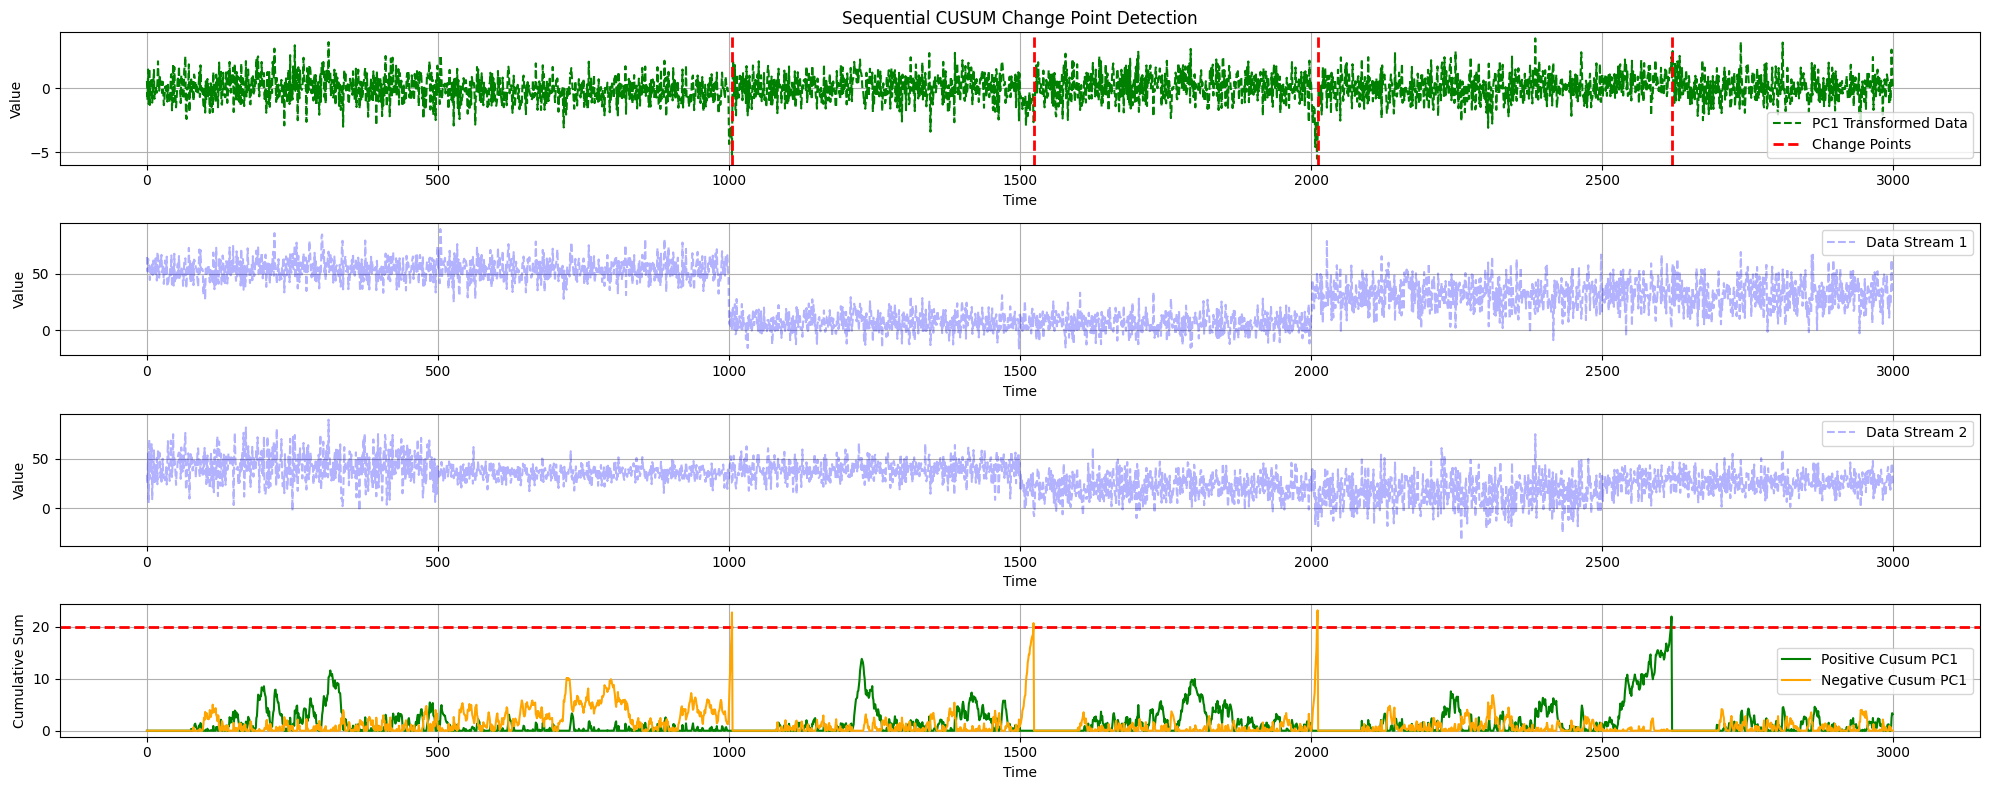

In [77]:
from source.detector.cusum import PC1_CUSUM_Detector

# Initialize PC1-CUSUM Detector
pc1_detector = PC1_CUSUM_Detector(warmup_period=75, delta=0.3, threshold=20)
# Offline Detection
results = pc1_detector.offline_detection(data_streams_arr)
# Plot Change Points
pc1_detector.plot_change_points(data_streams=data_streams_arr,
                                    pos_changes=results['pos_changes'], 
                                    neg_changes=results['neg_changes'], 
                                    change_points=results['change_points'])